In [1]:
%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 15, 10 # Set default width and height for matplotlib figures

In [24]:
import matplotlib.pyplot as plt
from itertools import cycle
import sqlite3
import config

TARGET = "print"
TARGET = "screen"


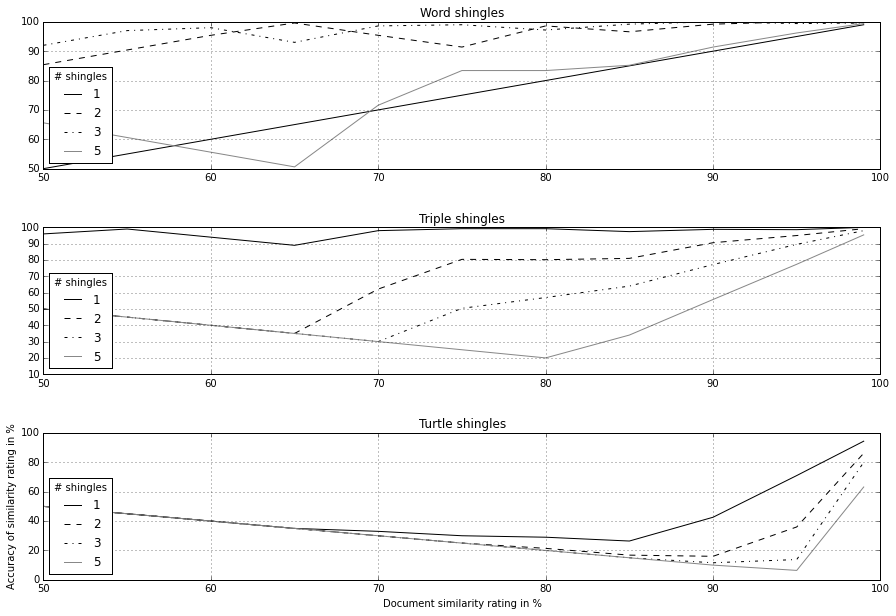

In [28]:
# Plot accuracy of each hashing method vs file similarity

conn = sqlite3.connect('comparison_results.db')
c = conn.cursor()

resultset = 'test_data3'
sql = """SELECT actual_similarity, shingle_type, shingle_size, similarity_rating, 
1 - ABS(actual_similarity-similarity_rating) AS accuracy
FROM comparison_results
WHERE shingle_type=? and data_dir=? 
ORDER BY actual_similarity, shingle_type

"""

fig, ax = plt.subplots(3)

def plot_rows(rows, axis, title):
    plot_data = {}
    colors = ["#000000", "#000000", "#000000", "#888888"]
    lines = ["-", "--", "-.", "-"]
    colorcycler = cycle(colors)
    linecycler  = cycle(lines)
    for row in rows:
        #print row
        if row[2] not in plot_data:
            plot_data[row[2]] = {"x":[], "y":[]}
        plot_data[row[2]]["x"].append(row[0]*100)
        plot_data[row[2]]["y"].append(row[4]*100)
    #print plot_data
    plot_handles = {}
    for d in plot_data:
        if TARGET == "print":
            plot_handles[d], = axis.plot(plot_data[d]["x"], plot_data[d]["y"], color=next(colorcycler), 
                                         linestyle=next(linecycler), label=str(d))
        else:
            plot_handles[d], = axis.plot(plot_data[d]["x"], plot_data[d]["y"], label=str(d))
    legend = axis.legend(handles=plot_handles.values(), loc=3, title="# shingles")
    legend.get_frame().set_facecolor('#ffffff')
    axis.grid(True)
    axis.set_title(title)


plot_rows(c.execute(sql, ('word',resultset)), ax[0], "Word shingles")
plot_rows(c.execute(sql, ('triple',resultset)), ax[1], "Triple shingles")
plot_rows(c.execute(sql, ('turtle',resultset)), ax[2], "Turtle shingles")
plt.ylabel("Accuracy of similarity rating in %")
plt.xlabel("Document similarity rating in %")
plt.subplots_adjust(hspace=.4)
plt.savefig('fig_shingle_size_accuracy.pdf')


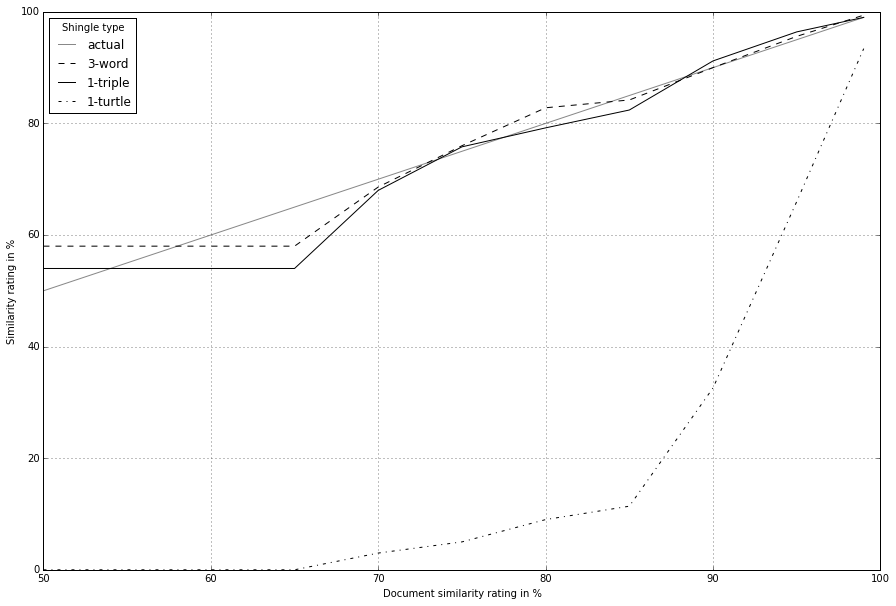

In [31]:
# Plot calculated similarity vs similarity rate

conn = sqlite3.connect('comparison_results.db')
c = conn.cursor()

resultset = 'test_data3'
sql = """SELECT actual_similarity, similarity_rating
FROM comparison_results
WHERE shingle_type=? AND data_dir=?
AND shingle_size = ?
ORDER BY actual_similarity

"""

#fig, ax = plt.subplots(3)

def plot_rows(rows, axis, label="", lcolor="#000000", lstyle="-"):
    plot_data = {
        "x":[], 
        "y":[]
    }
    for row in rows:
        #print row
        plot_data["x"].append(row[0]*100)
        plot_data["y"].append(row[1]*100)
    #print plot_data
    plot_handles = {}
    if TARGET == "print":
        return axis.plot(plot_data["x"], plot_data["y"], color=lcolor, linestyle=lstyle, label=label)
    else:
        return axis.plot(plot_data["x"], plot_data["y"], label=label)

colors = ["#888888", "#000000", "#000000", "#000000"]
lines = ["-", "--", "-", "-."]
colorcycler = cycle(colors)
linecycler  = cycle(lines)

plot_rows(c.execute(sql.replace("similarity_rating","actual_similarity"), ('word',resultset,3)), plt, "actual", next(colorcycler), next(linecycler))
plot_rows(c.execute(sql, ('word',resultset, 3)), plt, "3-word", next(colorcycler), next(linecycler))
plot_rows(c.execute(sql, ('triple',resultset, 1)), plt, "1-triple", next(colorcycler), next(linecycler))
plot_rows(c.execute(sql, ('turtle',resultset, 1)), plt, "1-turtle", next(colorcycler), next(linecycler))
legend = plt.legend(loc=2, title="Shingle type")
legend.get_frame().set_facecolor('#ffffff')
plt.ylabel("Similarity rating in %")
plt.xlabel("Document similarity rating in %")
plt.grid(True)

plt.savefig('fig_shingle_type_accuracy2.pdf')